# 💻 Laptop Price Analysis

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc('figure',autolayout=True)
plt.rc('axes',labelweight="bold",labelsize="large",titleweight="bold",titlesize=14,titlepad=10)
from scipy import stats
import regex as re

<Figure size 640x480 with 0 Axes>

In [3]:
df=pd.read_csv('laptop_price.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
df.describe(include="all")

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


## Data Cleaning

In [9]:
df=df.rename(columns=str.lower)

In [10]:
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [11]:
df=df.rename(columns={'price_euros':'price'})

In [12]:
df[df.duplicated()]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price


## Dataset Cleaning + Feature Engineering

### Laptop

In [13]:
df['laptop_id']

0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_id, Length: 1303, dtype: int64

In [14]:
ind=0
for i in df['laptop_id']:
    if ind+1!=i:
        print(i)
        break
    ind+=1

66


In [15]:
df[df['laptop_id']==66]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
64,66,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,690.0


In [16]:
df=df.drop(columns='laptop_id',axis=1)

### Screen resolution

In [17]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

In [18]:
df['resolution']=df['screenresolution'].str.extract(r'(\d+x\d+)')

In [19]:
df['screentype']=df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)

In [20]:
df['screentype']=df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [21]:
df['screentype']

0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298     IPS Panel   Touchscreen 
1299     IPS Panel   Touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

In [22]:
df['touchscreen']=df['screentype'].str.extract(r'(Touchscreen)')
df['screentype']=df['screentype'].replace(r'(Touchscreen)','',regex=True)

In [23]:
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [24]:
df['touchscreen']=df['touchscreen'].replace('Touchscreen',1)
df['touchscreen']=df['touchscreen'].replace(np.nan,0)

In [25]:
df['touchscreen'].value_counts()

0.0    1111
1.0     192
Name: touchscreen, dtype: int64

In [26]:
df['screentype'].value_counts()

                             549
                             314
IPS Panel                    265
                              75
IPS Panel                     72
IPS Panel Retina Display      17
IPS Panel                     11
Name: screentype, dtype: int64

In [27]:
df['screentype']=df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [28]:
df['screentype']=df['screentype'].replace(r'^\s*$',np.nan,regex=True)
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [29]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [30]:
df=df.drop(columns='screenresolution',axis=1)

In [31]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [32]:
df['resolution'].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: resolution, dtype: int64

In [33]:
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [34]:
df['touchscreen'].value_counts()

0.0    1111
1.0     192
Name: touchscreen, dtype: int64

### CPU

In [35]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [36]:
df['cpu_freq']=df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')

In [37]:
df['cpu_freq'].value_counts()

2.5GHz     290
2.7GHz     165
2.8GHz     165
1.6GHz     133
2.3GHz      86
1.8GHz      78
2.6GHz      76
2GHz        67
1.1GHz      53
2.4GHz      52
2.9GHz      21
3GHz        19
2.0GHz      19
1.2GHz      15
1.44GHz     12
2.2GHz      11
1.5GHz      10
1.3GHz       6
3.6GHz       5
0.9GHz       4
3.1GHz       3
2.1GHz       3
2.50GHz      3
1.9GHz       2
1.60GHz      1
3.2GHz       1
1.0GHz       1
1.92GHz      1
2.70GHz      1
Name: cpu_freq, dtype: int64

In [38]:
df['cpu_freq']=df['cpu_freq'].str.replace("GHz",'')
df.rename(columns={'cpu_freq':'cpu_freq(GHz)'},inplace=True)

In [39]:
df['cpu_freq(GHz)']=df['cpu_freq(GHz)'].astype('float')

In [40]:
df['cpu']=df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)','',regex=True)

In [41]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


### RAM

In [42]:
df['ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: ram, Length: 1303, dtype: object

In [43]:
df['ram']=df['ram'].str.replace('GB','')

In [44]:
df.rename(columns={'ram':'ram(GB)'},inplace=True)

In [45]:
df['ram(GB)']=df['ram(GB)'].astype('int')

In [46]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


### Memory

In [47]:
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [48]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
df['memory_1']=df['memory']

In [50]:
df['memory_1']=df['memory_1'].str.replace('1.0TB','1TB',regex=True)
df['memory_1']=df['memory_1'].str.replace('1TB','1000GB')
df['memory_1']=df['memory_1'].str.replace('2TB','2000GB')
df['memory_1']=df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [51]:
df['memory2']=df['memory_1'].str.replace(r' ','')
df['memory2'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [52]:
memory_1=[]
memory_2=[]
for i in df['memory2']:
    if len(re.findall(r'\+',i))==1: # Double Drive
        one=re.findall(r'\w+',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: # Single Drive 
        one=re.findall(r'\w+',i)
        memory_1.append(one[0])
        memory_2.append('NaN')
        

In [53]:
memory_1_gb=[]
memory_1_type=[]
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])

In [54]:
memory_2_gb=[]
memory_2_type=[]
for i in memory_2:
    if i !='NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)

In [55]:
df['memory_1_sto(GB)']=memory_1_gb
df['memory_1_type']=memory_1_type
df['memory_2_sto(GB)']=memory_2_gb
df['memory_2_type']=memory_2_type

In [56]:
df['memory_1_sto(GB)']=df['memory_1_sto(GB)'].astype('float')
df['memory_2_sto(GB)']=df['memory_2_sto(GB)'].astype('float')

In [57]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,...,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1,memory2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1440x900,NaN,0.0,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,1920x1080,NaN,0.0,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [58]:
df=df.drop(columns=['memory','memory_1','memory2'])

In [59]:
df=df.replace({'NaN':np.nan})

In [60]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


### Weight

In [61]:
df['weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: weight, Length: 179, dtype: int64

In [62]:
df['weight'].str.contains('kg').sum()

1303

In [63]:
df['weight']=df['weight'].str.replace('kg','').astype('float')

In [64]:
df.rename(columns={'weight':'weight(kg)'},inplace=True)

In [65]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN


### CPU and GPU manifacturing companies

In [66]:
df['cpu_brand']=df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [67]:
df[df['cpu_brand']=='Samsung']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400x1600,IPSPanel,1.0,2.0,32.0,FlashStorage,0.0,NaN,Samsung


In [68]:
df=df.drop(1191)

In [69]:
df['gpu_brand']=df['gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

In [70]:
df[df['gpu_brand']=='ARM']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand


In [71]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int32  
 6   gpu               1302 non-null   object 
 7   opsys             1302 non-null   object 
 8   weight(kg)        1302 non-null   float64
 9   price             1302 non-null   float64
 10  resolution        1302 non-null   object 
 11  screentype        364 non-null    object 
 12  touchscreen       1302 non-null   float64
 13  cpu_freq(GHz)     1302 non-null   float64
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


In [73]:
df.to_csv('laptop-clean.csv',index=False)

## Exploratory Data Analysis (EDA)

In [74]:
df1=pd.read_csv('laptop-clean.csv')
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128.0,SSD,0.0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128.0,FlashStorage,0.0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256.0,SSD,0.0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512.0,SSD,0.0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256.0,SSD,0.0,NaN,Intel,Intel


In [75]:
df_clean=df1.copy()

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1302 non-null   object 
 1   product           1302 non-null   object 
 2   typename          1302 non-null   object 
 3   inches            1302 non-null   float64
 4   cpu               1302 non-null   object 
 5   ram(GB)           1302 non-null   int64  
 6   gpu               1302 non-null   object 
 7   opsys             1302 non-null   object 
 8   weight(kg)        1302 non-null   float64
 9   price             1302 non-null   float64
 10  resolution        1302 non-null   object 
 11  screentype        364 non-null    object 
 12  touchscreen       1302 non-null   float64
 13  cpu_freq(GHz)     1302 non-null   float64
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


In [77]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent  in the dataframe?

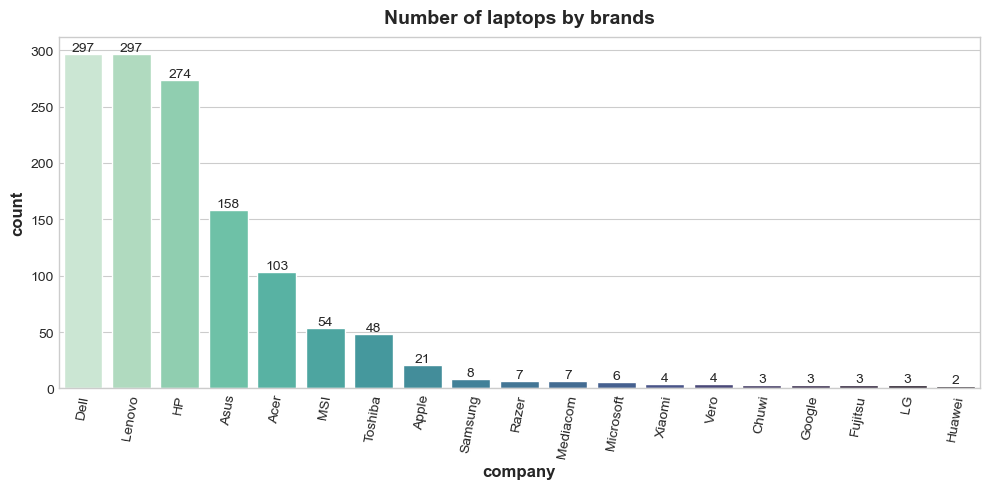

In [78]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company',data=df,palette='mako_r',order=df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

## What type of laptop is the most frequent?

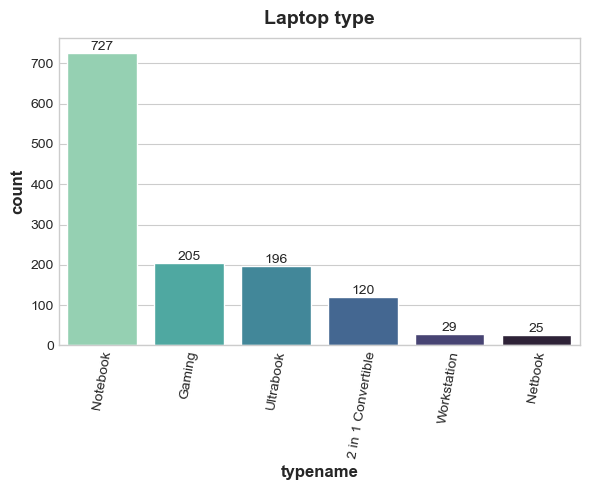

In [79]:
fig,ax=plt.subplots(figsize=(6,5))
ax=sns.countplot(x='typename',data=df,palette='mako_r',order=df['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Laptop type')
plt.show()

In [80]:
print("Most laptops are notebooks, which make {:.2f}% of the total laptops".format(len(df[df['typename']=='Notebook'])*100/len(df)))

Most laptops are notebooks, which make 55.84% of the total laptops


## Which size is the most popular?

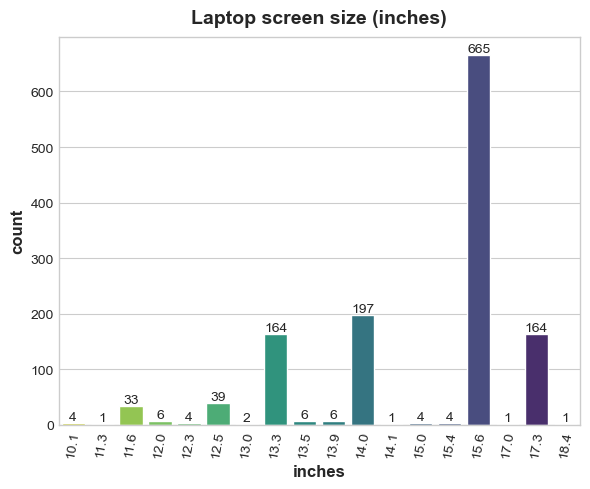

In [81]:
fig,ax=plt.subplots(figsize=(6,5))
ax=sns.countplot(x='inches',data=df,palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [82]:
print("Most laptops have 15.6 inches, which make {:.2f}% of the total laptops".format(len(df[df['inches']==15.6])*100/len(df)))

Most laptops have 15.6 inches, which make 51.08% of the total laptops


In [83]:
inches_list=df['inches'].value_counts().index[:6].to_list()
inches_list

[15.6, 14.0, 13.3, 17.3, 12.5, 11.6]

In [84]:
df_clean=df_clean[df_clean['inches'].isin(inches_list)]

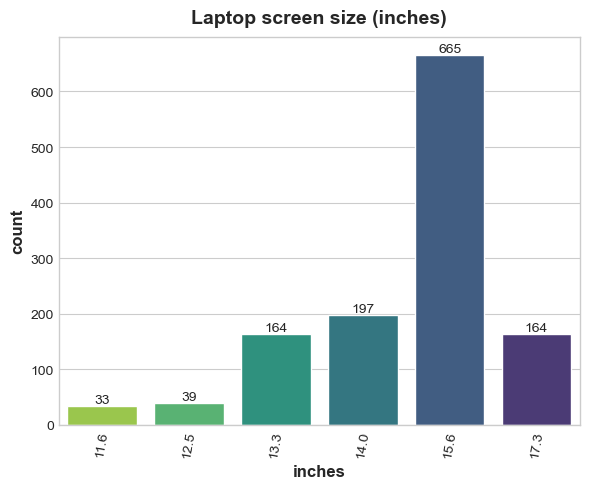

In [85]:
fig,ax=plt.subplots(figsize=(6,5))
ax=sns.countplot(x='inches',data=df_clean,palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [86]:
print("We removed {} outliers".format(len(df)-len(df_clean)))

We removed 40 outliers


## How is weight distributed among the laptops?

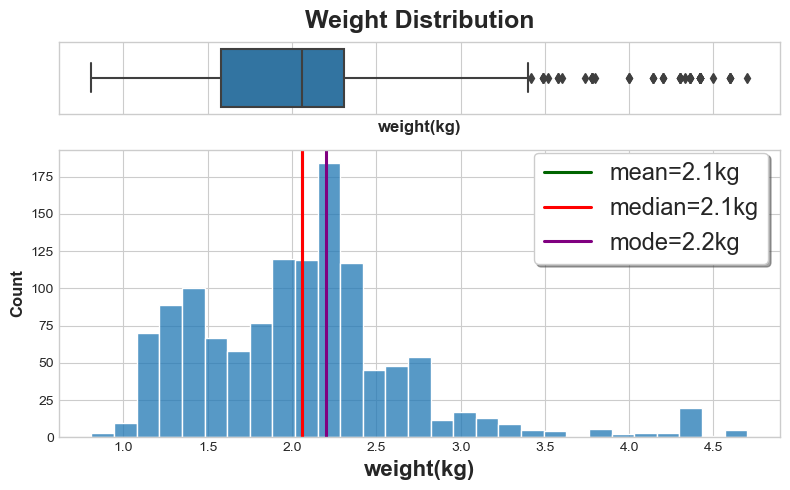

In [87]:
num_plot(df_clean,'weight(kg)','Weight Distribution','kg')

## How is price distributed among the laptops?

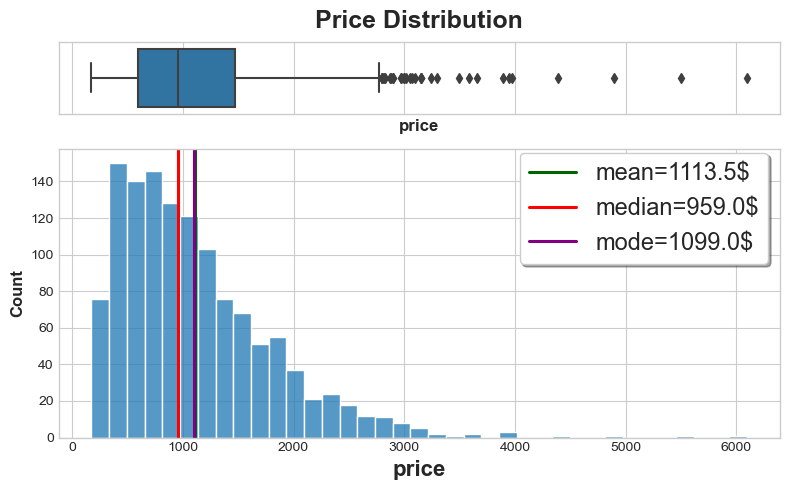

In [88]:
num_plot(df_clean,'price','Price Distribution','$')

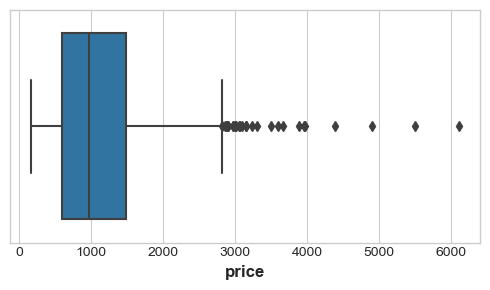

In [89]:
fig,ax=plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='price',data=df)

<AxesSubplot:xlabel='typename', ylabel='price'>

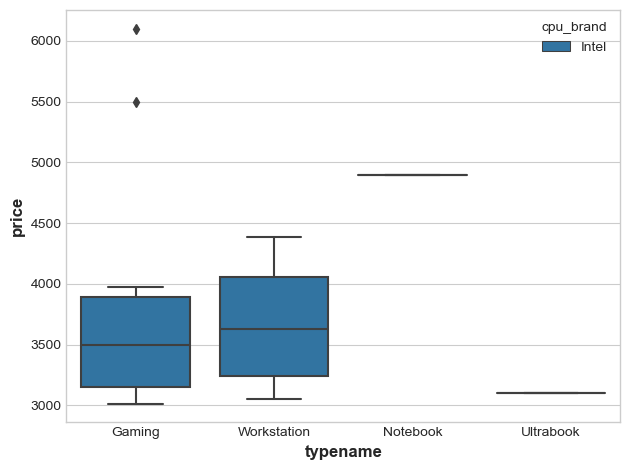

In [90]:
sns.boxplot(x='typename',y='price',data=df[df['price']>3000],hue='cpu_brand')

In [91]:
df[df['price']>4500]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,3840x2160,NaN,1.0,2.9,1000.0,SSD,0.0,NaN,Intel,Nvidia
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6,32,Nvidia Quadro M2200M,Windows 10,2.50,4899.0,3840x2160,IPSPanel,0.0,3.1,1000.0,SSD,0.0,NaN,Intel,Nvidia
830,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK,32,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,3840x2160,NaN,1.0,2.9,512.0,SSD,0.0,NaN,Intel,Nvidia


## How is RAM distributed among the laptops?

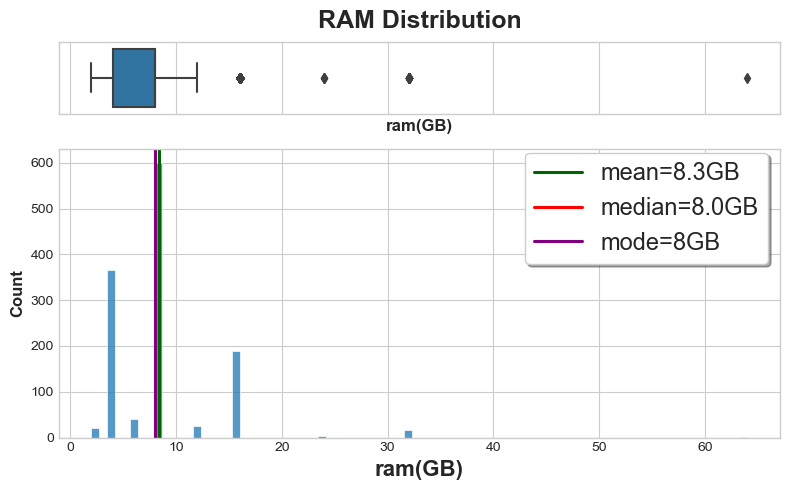

In [92]:
num_plot(df_clean,'ram(GB)','RAM Distribution','GB')

In [93]:
print("Most laptops have 8 GB RAM, which make {:.2f}% of the total laptops".format(len(df[df['ram(GB)']==8])*100/len(df)))

Most laptops have 8 GB RAM, which make 47.54% of the total laptops


## How is CPU frequency distributed among the laptops?

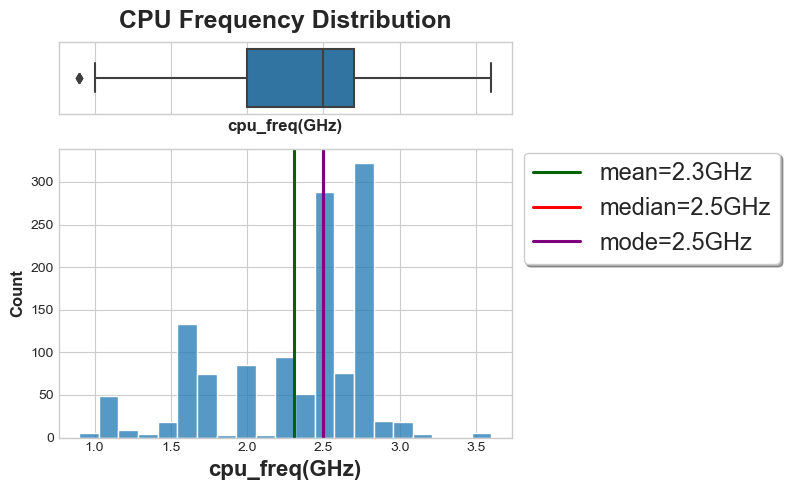

In [94]:
num_plot(df_clean,'cpu_freq(GHz)','CPU Frequency Distribution','GHz')

In [95]:
print("Most laptops have 2.5 GHz CPU, which make {:.1f}% of the total laptops".format(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df)))

Most laptops have 2.5 GHz CPU, which make 22.5% of the total laptops


## How is Hard Drive capcity distributed among the laptops?

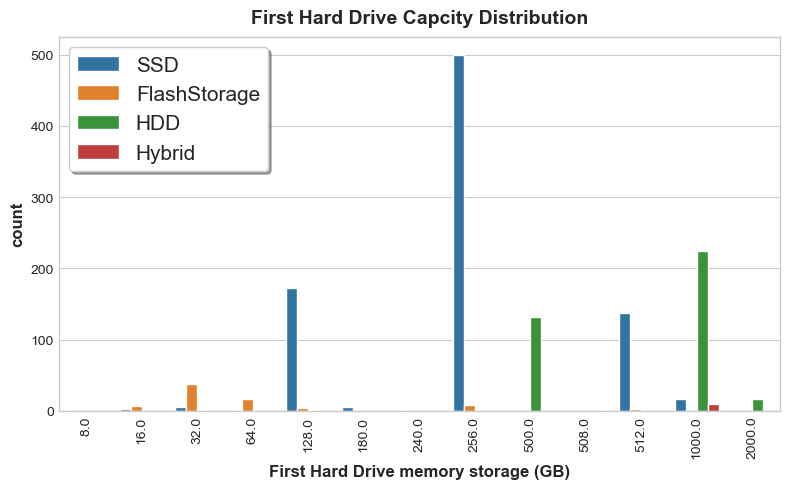

In [97]:
fig,ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_1_sto(GB)',data=df,hue='memory_1_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("First Hard Drive memory storage (GB)")
plt.title("First Hard Drive Capcity Distribution")
plt.legend(loc='upper left',ncol=1,fontsize=15,fancybox=True,shadow=True,frameon=True)
plt.show()

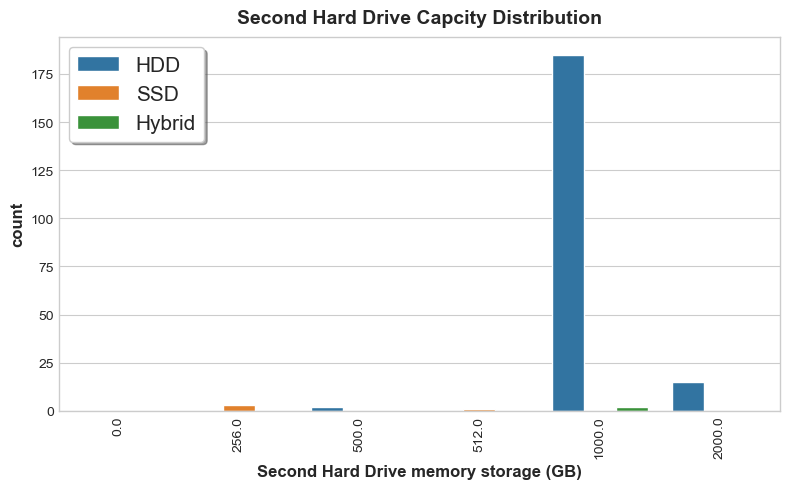

In [98]:
fig,ax=plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_2_sto(GB)',data=df,hue='memory_2_type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Second Hard Drive memory storage (GB)")
plt.title("Second Hard Drive Capcity Distribution")
plt.legend(loc='upper left',ncol=1,fontsize=15,fancybox=True,shadow=True,frameon=True)
plt.show()

## Multivariate outliers detection

## Price vs RAM

In [100]:
def lr_plot(df,col_x,col_y,leg):
    slope, intercept, rvalue, pvalue, stderr=stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x,y=col_y,data=df,color='#0d98ba',line_kws={'label':'y={0:.1f}x+{1:.1f}'.format(slope,intercept)})
    plt.legend(loc=leg,ncol=1,fontsize=15,fancybox=True,shadow=True,frameon=True)
    plt.title(col_y+" VS "+col_x)
    plt.show()
    return slope,intercept


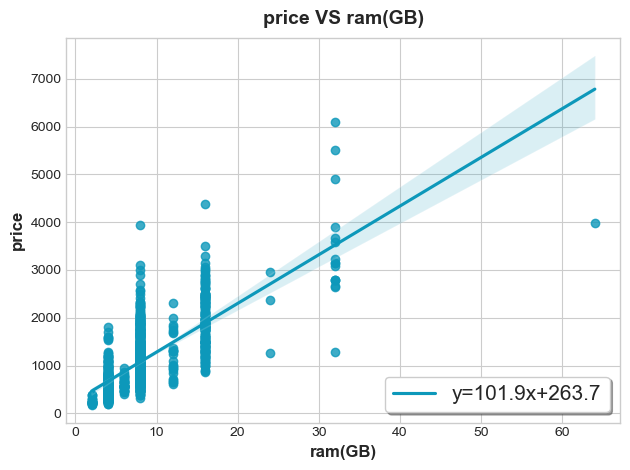

In [101]:
slope,intercept=lr_plot(df_clean,'ram(GB)','price','lower right')

In [102]:
df_clean[df_clean['ram(GB)']>60]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
1066,Asus,ROG G701VO,Gaming,17.3,Intel Core i7 6820HK,64,Nvidia GeForce GTX 980,Windows 10,3.58,3975.0,1920x1080,IPSPanel,0.0,2.7,1000.0,SSD,0.0,NaN,Intel,Nvidia


In [104]:
df_clean=df_clean[df_clean['ram(GB)']<60]

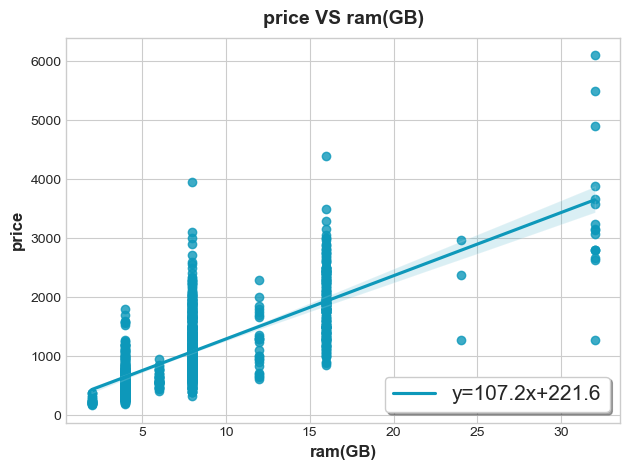

In [106]:
slope,intercept=lr_plot(df_clean,'ram(GB)','price','lower right')

### Price vs CPU Frequency

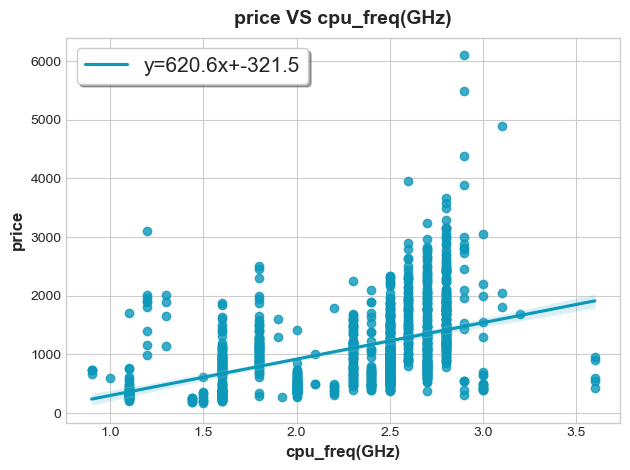

In [108]:
slope,intercept=lr_plot(df_clean,'cpu_freq(GHz)','price','upper left')

### Price vs inches

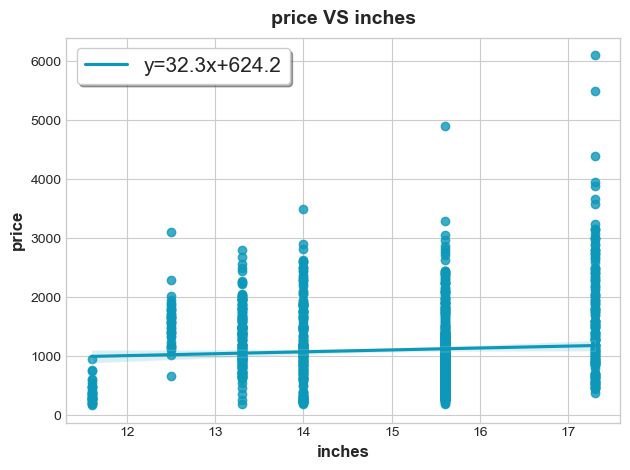

In [109]:
slope,intercept=lr_plot(df_clean,'inches','price','upper left')

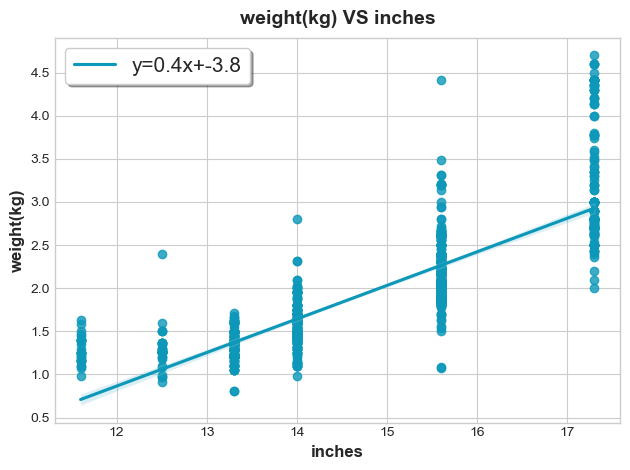

In [110]:
slope,intercept=lr_plot(df_clean,'inches','weight(kg)','upper left')

### Price VS CPU brand by GPU brand

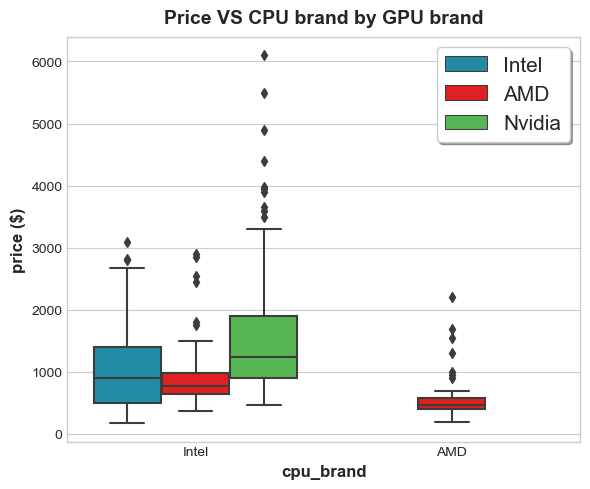

In [112]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig,ax=plt.subplots(figsize=(6,5))
sns.boxplot(x='cpu_brand',y='price',data=df,hue='gpu_brand',palette=cpu_palette)
ax.set_title("Price vs CPU brand by GPU brand")
plt.ylabel('price ($)')
plt.legend(loc='upper right',ncol=1,fontsize=15,fancybox=True,shadow=True,frameon=True)
plt.title("Price VS CPU brand by GPU brand")
plt.show()

## Which are the TOP 15 most common GPUs?

In [113]:
gpu_list=df_clean['gpu'].value_counts()[:15].index.tolist()

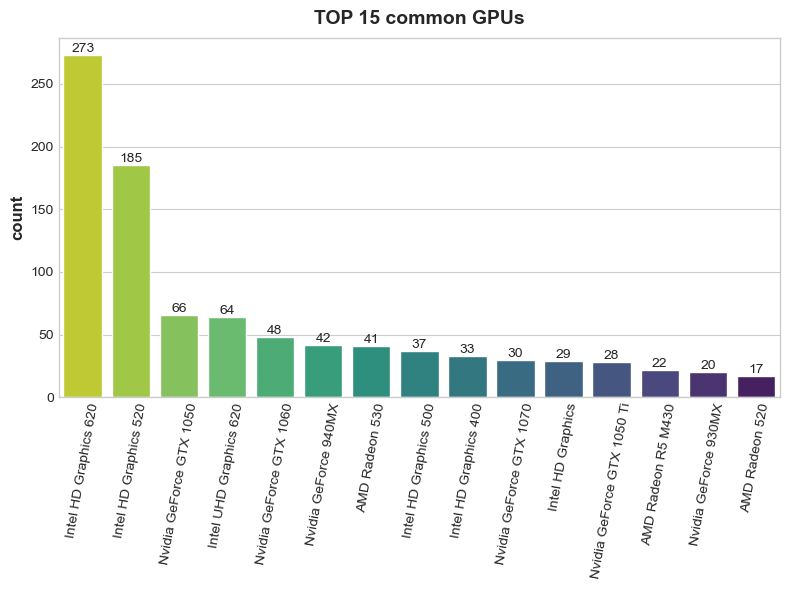

In [114]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='gpu',data=df_clean[df_clean['gpu'].isin(gpu_list)],order=gpu_list,palette='viridis_r')
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.title("TOP 15 common GPUs")
plt.xlabel('')
plt.show()

## Which are the TOP 15 most common CPUs?

In [116]:
cpu_list=df_clean['cpu'].value_counts()[:15].index.tolist()

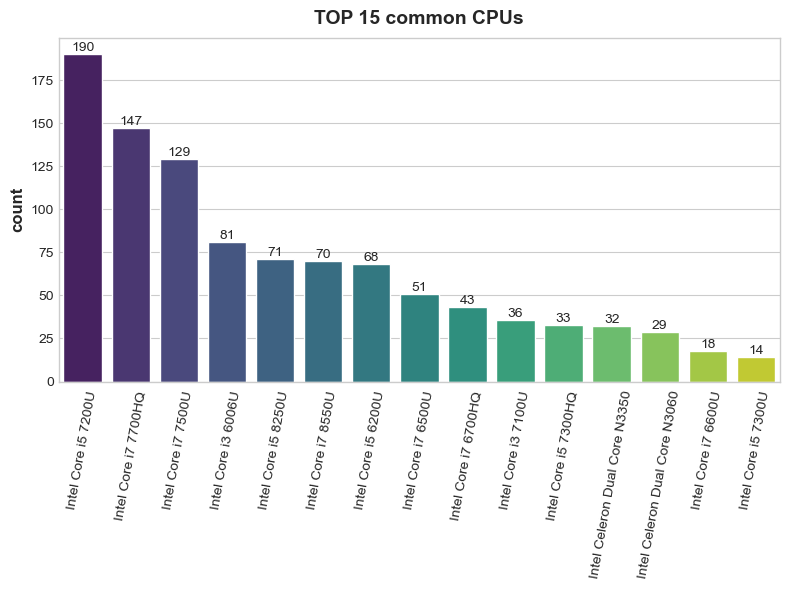

In [118]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='cpu',data=df_clean[df_clean['cpu'].isin(cpu_list)],order=cpu_list,palette='viridis')
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.title("TOP 15 common CPUs")
plt.xlabel('')
plt.show()

## What is the average price of laptops by company?

In [119]:
df['company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: company, dtype: int64

In [120]:
company_list=df['company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

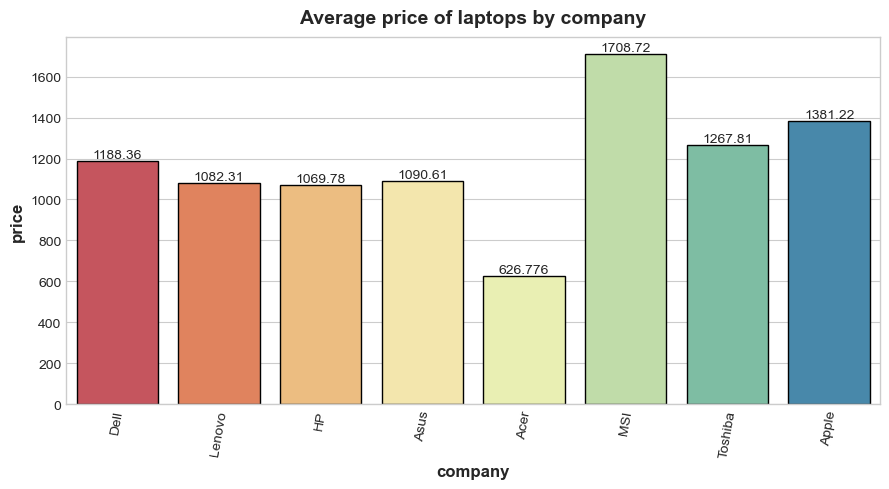

In [124]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='company',y='price',data=df_clean[df_clean['company'].isin(company_list)],order=company_list,
               palette='Spectral',errorbar=('ci', False),edgecolor="black")
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.title("Average price of laptops by company")
plt.show()

### Correlation Matrix

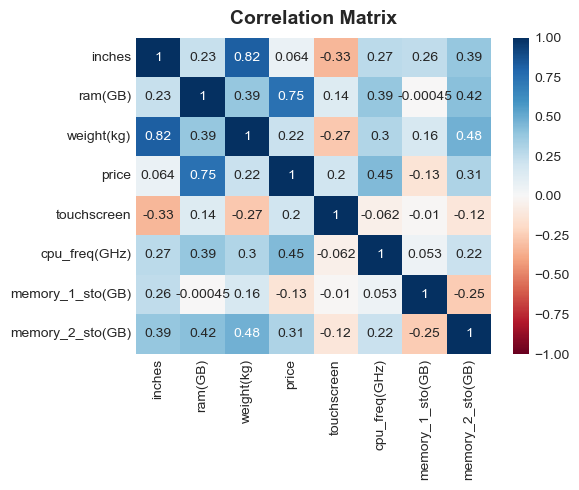

In [127]:
plt.figure(figsize=(6,5))
sns.heatmap(df_clean.corr(),cmap="RdBu",annot=True,vmin=-1,vmax=1)
plt.title("Correlation Matrix")
plt.show()